## Information Theory
**FIZ371 - Scientific & Technical Computations | 01/05/2020**

**Information Theory Application**
* Message Transmission Over A Noisy Channel
    * Original Message (Smiley Image)
    * Adding noise
    * Repetition Algorithm
        * Encoding the message before transmission over the noisy channel and decoding it on the otherside
            * With 3-repetition:
            * With 5-repetition:
    * Hamming Code (7,4)
        * Encoding the message before transmission over the noisy channel and decoding it on the otherside
            
Dr. Emre S. Tasci <emre.tasci@hacettepe.edu.tr>

# Message Transmission Over A Noisy Channel



## Original Message (Smiley Image)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 1. 1. 0.]
 [0. 0. 1. 1. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


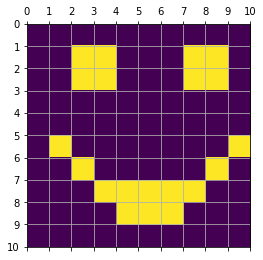

In [11]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(371)

smiley = np.zeros([10,10])

smiley[1,[2,3,7,8]] = 1
smiley[2,[2,3,7,8]] = 1
smiley[5,[1,9]] = 1
smiley[6,[2,8]] = 1
smiley[7,3:8] = 1
smiley[8,4:7] = 1
print(smiley)

def show_mat(mat):
    plt.matshow(mat);
    plt.xticks(np.arange(-0.5,mat.shape[1]),np.arange(0,mat.shape[1]+1))
    plt.yticks(np.arange(-0.5,mat.shape[0]),np.arange(0,mat.shape[0]+1))
    plt.grid(True)
    plt.show()

show_mat(smiley)

## Adding noise

[[0 0 0 0 0 0 0 0 1 0]
 [0 0 1 1 0 0 0 1 1 0]
 [1 0 1 1 0 0 0 1 1 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 1 1]
 [0 0 1 0 0 0 1 0 1 0]
 [0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
# Flipped cells:  9
Ratio of the flipped cells to total: 0.090


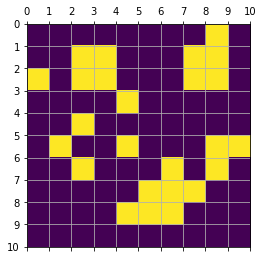

In [2]:
def rand_filter(mat,beta):
    # Flip each of the given mat's cells with
    # a probability of beta
    size = mat.shape
    rnd = (np.random.rand(size[0],size[1])<beta).astype(int)
    res = np.logical_xor(mat,rnd).astype(int)
    #print(rnd)
    print(res)
    #show_mat(res)
    print("# Flipped cells: %2d"%(np.sum(rnd)))
    print("Ratio of the flipped cells to total: %.3f"%(np.sum(rnd)/mat.size))
    return res

    
smiley_with_noise = rand_filter(smiley,0.1)
show_mat(smiley_with_noise)

## Repetition Algorithm

(10, 10)
(10, 50)


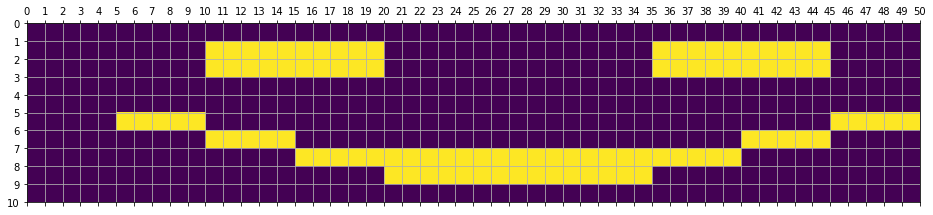

In [3]:
def rep_enc(mat,n):
    # Repeat the given mat's each cell n times
    size = mat.shape
    print(size)
    mat_repeated = np.empty([size[0],n*size[1]])
    print (mat_repeated.shape)
    for i in range(size[0]):
        for j in range(size[1]):
            #print(i,j,":",np.arange(n*j,n*j+n),mat[i,j])
            mat_repeated[i,np.arange(n*j,n*j+n)] = mat[i,j]
    return mat_repeated

smiley_encoded = rep_enc(smiley,5)
#print(a)

show_mat(smiley_encoded)


(10, 10)
(10, 50)


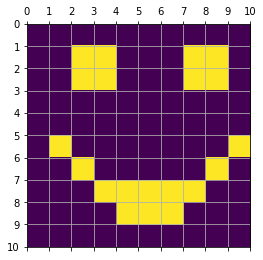

In [4]:
def rep_dec(mat,n):
    # Decodes the given mat, in accordance with
    # the given repetition number n
    size = mat.shape
    res = np.empty([size[0],int(size[1]/n)])
    res_size = res.shape
    for i in range(size[0]):
        for j in range(res_size[1]):
            #print("%d %d"%(i,j))
            res[i,j] = (np.sum(mat[i,np.arange(n*j,n*j+n)])>(n/2)).astype(int)
    return res
            
show_mat(rep_dec(rep_enc(smiley,5),5))

## Encoding the message before transmission over the noisy channel and decoding it on the otherside

### With 3-repetition:

(10, 10)
(10, 30)
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0]
 [0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1]
 [0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
# Flipped cells: 25
Ratio of the flipped cells to total: 0.083


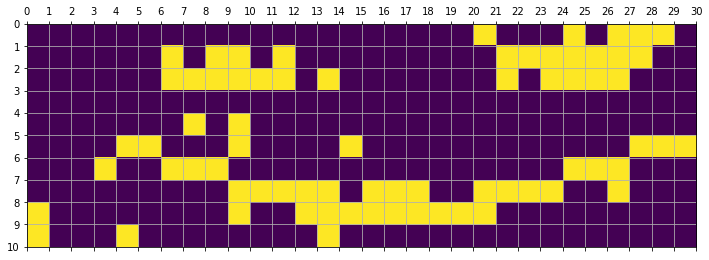

(10, 10)


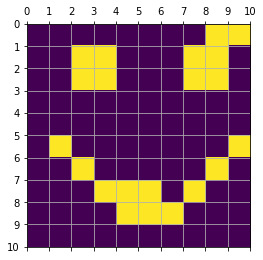

# Flipped cells:  3
Ratio of the flipped cells to total: 0.030


In [5]:
smiley_encoded = rep_enc(smiley,3)
smiley_enc_transmitted = rand_filter(smiley_encoded,0.1)
show_mat(smiley_enc_transmitted)
smiley_decoded = rep_dec(smiley_enc_transmitted,3)
print(smiley_decoded.shape)
show_mat(smiley_decoded)

# Calculate the number of flipped cells
print("# Flipped cells: %2d"%np.sum(np.logical_xor(smiley,smiley_decoded)))
print("Ratio of the flipped cells to total: %.3f"%(np.sum(np.logical_xor(smiley,smiley_decoded))/smiley.size))

### With 5-repetition:

(10, 10)
(10, 50)
[[0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
  1 1 1 0 1 0 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1
  0 1 1 1 1 0 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0
  0 0 0 1 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
  0 0 0 0 1 0 0 0 0 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 1 1 1 1 0 0 0 0 1]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1
  0 1 1 1 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

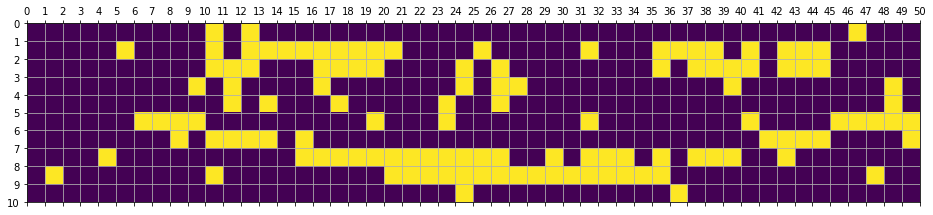

(10, 10)


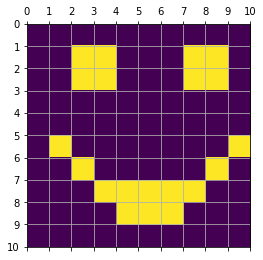

# Flipped cells:  0
Ratio of the flipped cells to total: 0.000


In [6]:
smiley_encoded = rep_enc(smiley,5)
smiley_enc_transmitted = rand_filter(smiley_encoded,0.1)
show_mat(smiley_enc_transmitted)
smiley_decoded = rep_dec(smiley_enc_transmitted,5)
print(smiley_decoded.shape)
show_mat(smiley_decoded)

# Calculate the number of flipped cells
print("# Flipped cells: %2d"%np.sum(np.logical_xor(smiley,smiley_decoded)))
print("Ratio of the flipped cells to total: %.3f"%(np.sum(np.logical_xor(smiley,smiley_decoded))/smiley.size))

## Hamming Code (7,4)

To efficiently employ the (7,4) Hamming Code, we are increasing our smiley's dimensions to 10x12 to comply with the 4 bit packages of data (4x3=12).

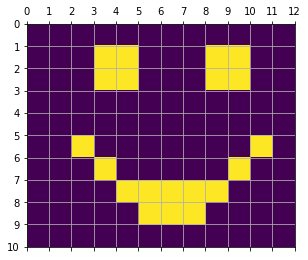

In [7]:
smiley_12 = np.zeros([10,12])
smiley_12[:,1:11] = smiley
show_mat(smiley_12)

In [8]:
def H74_enc(mat):
    size = mat.shape
    if(size[1]%4):
        print("The number of columns must be a multiple of 4!")
    res = np.empty([size[0],int(size[1]/4*7)])
    a = 0
    for i in range(size[0]):
        for j in range(int(size[1]/4)):
            a += 1
            current_4 = mat[i,range(4*j,4*j+4)]
            print(current_4,end="")
            t5 = int(np.sum(current_4[0:3])%2)
            t6 = int(np.sum(current_4[1:4])%2)
            t7 = int(np.sum(current_4[[0,2,3]])%2)
            print(t5,t6,t7,end="|")
            res[i,range(7*j,7*j+7)] = np.concatenate((current_4,[t5],[t6],[t7]))
        print ("")
    return res
encd_H74 = H74_enc(smiley_12)
print(encd_H74)

[0. 0. 0. 0.]0 0 0|[0. 0. 0. 0.]0 0 0|[0. 0. 0. 0.]0 0 0|
[0. 0. 0. 1.]0 1 1|[1. 0. 0. 0.]1 0 1|[1. 1. 0. 0.]0 1 1|
[0. 0. 0. 1.]0 1 1|[1. 0. 0. 0.]1 0 1|[1. 1. 0. 0.]0 1 1|
[0. 0. 0. 0.]0 0 0|[0. 0. 0. 0.]0 0 0|[0. 0. 0. 0.]0 0 0|
[0. 0. 0. 0.]0 0 0|[0. 0. 0. 0.]0 0 0|[0. 0. 0. 0.]0 0 0|
[0. 0. 1. 0.]1 1 1|[0. 0. 0. 0.]0 0 0|[0. 0. 1. 0.]1 1 1|
[0. 0. 0. 1.]0 1 1|[0. 0. 0. 0.]0 0 0|[0. 1. 0. 0.]1 1 0|
[0. 0. 0. 0.]0 0 0|[1. 1. 1. 1.]1 1 1|[1. 0. 0. 0.]1 0 1|
[0. 0. 0. 0.]0 0 0|[0. 1. 1. 1.]0 1 0|[0. 0. 0. 0.]0 0 0|
[0. 0. 0. 0.]0 0 0|[0. 0. 0. 0.]0 0 0|[0. 0. 0. 0.]0 0 0|
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1.]
 [0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1.]
 [0. 0. 0. 1. 0. 1. 1. 0

In [9]:
syndromes = np.empty([2,2,2],dtype=int)
syndromes[0,0,0] = -1
syndromes[0,0,1] = 6
syndromes[0,1,0] = 5
syndromes[0,1,1] = 3
syndromes[1,0,0] = 4
syndromes[1,0,1] = 0
syndromes[1,1,0] = 1
syndromes[1,1,1] = 2

def H74_dec(mat):
    size = mat.shape
    print(size)
    if(size[1]%7):
        print("The number of columns must be a multiple of 7!")
    res = np.empty([size[0],int(size[1]/7*4)])
    for i in range(size[0]):
        for j in range(int(size[1]/7)):
            current_7 = mat[i,range(7*j,7*j+7)]
            z1 = int(np.sum(current_7[[4,0,1,2]])%2)
            z2 = int(np.sum(current_7[[5,1,2,3]])%2)
            z3 = int(np.sum(current_7[[6,0,2,3]])%2)
            syndrome = syndromes[z1,z2,z3]
            print(i,j,current_7,[z1,z2,z3]," ==> flip:","{:-2d}.bit".format(syndrome),end=" | ")
            #if(syndrome>-1 and syndrome<5):
            if(syndrome>-1):
                current_7[syndrome] = np.logical_xor(current_7[syndrome],1)
                print(current_7,end="")
            res[i,range(4*j,4*j+4)] = current_7[0:4]
            print("")
    return(res)
    
# H74_dec(encd_H74)

### Encoding the message before transmission over the noisy channel and decoding it on the otherside

[0. 0. 0. 0.]0 0 0|[0. 0. 0. 0.]0 0 0|[0. 0. 0. 0.]0 0 0|
[0. 0. 0. 1.]0 1 1|[1. 0. 0. 0.]1 0 1|[1. 1. 0. 0.]0 1 1|
[0. 0. 0. 1.]0 1 1|[1. 0. 0. 0.]1 0 1|[1. 1. 0. 0.]0 1 1|
[0. 0. 0. 0.]0 0 0|[0. 0. 0. 0.]0 0 0|[0. 0. 0. 0.]0 0 0|
[0. 0. 0. 0.]0 0 0|[0. 0. 0. 0.]0 0 0|[0. 0. 0. 0.]0 0 0|
[0. 0. 1. 0.]1 1 1|[0. 0. 0. 0.]0 0 0|[0. 0. 1. 0.]1 1 1|
[0. 0. 0. 1.]0 1 1|[0. 0. 0. 0.]0 0 0|[0. 1. 0. 0.]1 1 0|
[0. 0. 0. 0.]0 0 0|[1. 1. 1. 1.]1 1 1|[1. 0. 0. 0.]1 0 1|
[0. 0. 0. 0.]0 0 0|[0. 1. 1. 1.]0 1 0|[0. 0. 0. 0.]0 0 0|
[0. 0. 0. 0.]0 0 0|[0. 0. 0. 0.]0 0 0|[0. 0. 0. 0.]0 0 0|
[[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1]
 [1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1]
 [0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1]
 [1 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0]
 [0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1]
 [0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0

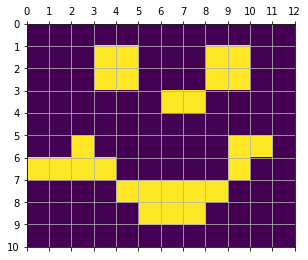

# Flipped cells:  6
Ratio of the flipped cells to total: 0.050


In [12]:
encd_H74 = H74_enc(smiley_12)
encd_H74_noise = rand_filter(encd_H74,0.1)
decd_H74 = H74_dec(encd_H74_noise)
show_mat(decd_H74)
# Calculate the number of flipped cells
print("# Flipped cells: %2d"%np.sum(np.logical_xor(smiley_12,decd_H74)))
print("Ratio of the flipped cells to total: %.3f"%(np.sum(np.logical_xor(smiley_12,decd_H74))/smiley_12.size))

**_Homework: Develop Hamming Code (8,4), calculate its probability error, discuss why HC(7,4) is preferable to HC(8,4) -- compare it with the double repetition algorithm R<sub>2</sub>._**